In [2]:
%pylab inline
%config InlineBackend.figure_format = 'svg'
import pylab as plb
plb.rcParams['pdf.fonttype'] = 42

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


### 9/22/2014
*power meter recordings*

* recordings
    * nd32 = '100uW'
    * nd16 = '240uw'
    * nd08 = '0.530mW'
    * nd04 = '1.115mW'
    * nd02 = '2.26mW'
    *nd01 = '4.63mW'

### 9/29/2014
*note*

* results from cross: 
    * U82 X J149 - +
    * U82 X J100 - +
    * U82 X J23 - ++
    * U82 X J18 - +
* imaging setup:
    * 2,000 frame zoom in and out to collect reference frame for imaging

### 9/29/2014
*note*

Nice reference for thorax anatomy:
http://www.giand.it/diptera/morph/?id=5&lang=en

Imaging progress:
* Done: 
    * U82 X J121 n=6 [271,272,273,274,275,276]
    * U82 X J18 n=6 [265,266,267,268,269,270]
    * U82 X J100 n=6 [259,260,261,262,263,264]
    * U82 X J22 n=4 [255,256,257,258]
    * U82 X J23 n=6 [277,278,279,280,281,282]
* To Do:
    * J160
    * J146
    * J149
    * J22 (n=3)

### 12/2/2014
*optical power measurements*

nd on intensilight set to 4

Optical power measured @ 560nm using Cube#3 (chroma # 49008)
power = 3.5 mW

optical power measured @ 480nm using Cube#2 (chroma # 49011)
power = 2.2 mW


### 1/6/2015
*more optical power measurements*

optical power measured @ 480nm using Cube#2 (chroma # 49011)

* Measurements made from LED using tri-pulse protocol: 147uW

* Power from led under constant illumination: 4.0 mW

### 3/25/2015
*note*

39 fly_record.hdf5 files compressed and copied to GCE using a micro instance on the server side. The operation took 8.5 hrs.

### 6/12/2015
*Filter sets in Nikon FN1 located at Caltech*

All 'Semrock' brand
* 2: FITC - 3540B - NTE
* 3: TXRED - 4040B - NTE
* 4: LF488/LP - A - NTE
* 5: Custom 80/20 NIR C120714

### 7/7/2015
*Updated filter sets in Nikon FN1 located at Caltech*

* 1: Chroma 49008
* 2: Semrock FITC - 3540B - NTE
* 3: Semrock TXRED - 4040B - NTE
* 4: Semrock LF488/LP - A - NTE
* 5: Semrock Custom 80/20 NIR C120714
* 6: Chroma 49001

### 7/27/2015
*Procedure for segmenting muscle tissue*

* Import an 8bit tiff stack of a single channel into gimp: choose "Select All" and "Open pages as Layers" in the dialog box.

* convert to RGB (image>mode>RGB)

* Rename the background image as "Page 0"

* Save the imported stack as an .xcf (native gimp format) to use as a template.

* open a python console within gimp: filters>python-fu>Console

* get a reference to the image object:

```
>>> img = gimp.image_list()[0]
```


* add a blank layer in-between each existing layer

```
g = gimp.pdb
w = g.gimp_image_width(img)
h = g.gimp_image_height(img)
for lnum,layer in enumerate(reversed(img.layers)):
    g.gimp_image_set_active_layer(img,layer)
    new_layer = g.gimp_layer_new(img, w, h, RGBA_IMAGE, "lr%s"%(lnum), 1, NORMAL_MODE)
    img.add_layer(new_layer)
```

* hide all the layers:

```
for layer in img.layers:
    layer.visible = False
```

* starting from page 0 make the layers visible until you have reached the deepest slice of tissue you want to segment.

* Change the opacity of the transparent layers so you can see what you are segmenting

```
for layer in img.layers:
    if not('Page' in layer.name):
        layer.opacity = 0.2
```

* once you have completed the segmentation you can create a tiff stack with just the segmentation masks

* To delete the layers with the confocal data first make all layers visible: 

```
for layer in img.layers:
    layer.visible = True
```

* then hide layers not containing the string 'Page'

```
for layer in img.layers:
    if not('Page' in layer.name):
        layer.visible = False
```

* Merge the visible layers (Image>Merge Visible Layers)

* Delete the merged layer


### 12/1/2015
*deconvolution test*

Installed the pyfnnd library to test out Joshua Vogelstein's deconvolution method. First needed to install a shared lapack library using:

```
sudo apt-get install liblapack3.
```

Turns out that this method is not much more usefull than a high pass filter. It might work better for high-speed voltage imaging. Part of the problem is likely due to the fact that we have multiple spikes per frame

### 12/1/2015
*Calculation of solid angle obscured by objective (61°)*

In [2]:
import numpy as np
2*np.pi*(1-np.cos(np.deg2rad(61)))

3.2370366244684861

### 12/13/2015
*some usefull git commands*


just push a particular branch:
```
git push -u origin gce_b0
```

Status including untracked files
```
git status -uall *.ipynb
```

### 12/15/2015
*muscle motor neuron expression*

Just had a conversation with John Tuthill regarding motoneurons. He noted that there is a motoneurons with lots of psd95 synapses on the cell body in VNC. Labeled by line R13D10. Comparing the Janelia images to Anne's work I don't think it is the B1 motor neuron.

* The R13D10 line
<img src = "http://flimg.janelia.org:8080/flylight-image/external-data/adult/secdata/projections/20080517/GMR_13D10_AE_01_07-fA01v_C080517_20080519235629578/GMR_13D10_AE_01_07-fA01v_C080517_20080519235629578_total.jpg"height = 600>

* This is in contrast to the b1 motor neuron line identifed by anne in (R95D06):
<table>
<tr>
<td>
<img src = "http://flimg.janelia.org:8080/flylight-image/external-data/adult/secdata/projections/20100909/GMR_95D06_AE_01_01-fA01v_C100909_20100909094153765/GMR_95D06_AE_01_01-fA01v_C100909_20100909094153765_total.jpg" height = 500>
</td>
<td>
<img src = "experimental_notes_data/MAX_95D06_01.jpg" height = 500>
</td>
</tr>

</table>

* Here is the image of a line that we found expresses in the TTM motor neuron (29E05):
<table>
<tr>
<td>
<img src = "http://flimg.janelia.org:8080/flylight-image/external-data/adult/secdata/projections/20081114/GMR_29E05_AE_01_03-fA01v_C081114_20081114103915718/GMR_29E05_AE_01_03-fA01v_C081114_20081114103915718_total.jpg" height = 500>
</td>
<td>
<img src = "experimental_notes_data/MAX_29E05_01.jpg" height = 500>
</td>
</tr>

### 12/16/2015
*Dichroics purchased for dual-channel setup*

(<matplotlib.text.Text at 0x7f589b5de450>, None)

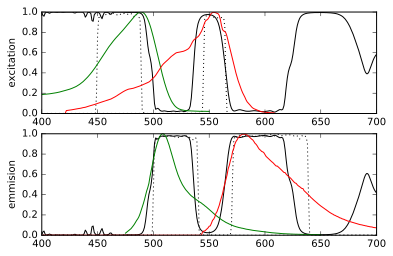

In [27]:
#! wget https://www.chroma.com/file/69765/download?token=z3DXiCms -O experimental_notes_data/chroma_T495lpxr.txt

#! wget https://www.chroma.com/file/67928/download?token=-hNR-Rvp -O experimental_notes_data/chroma_565dcxr.txt

#! wget https://www.chroma.com/file/69030/download?token=2v5nXO_K -O experimental_notes_data/chroma_T565lpxr.txt

import os
import numpy as np
#! wget https://www.chroma.com/file/58217/download?token=JsQQ35wr -O experimental_notes_data/chroma_ET470_40x.txt
#! wget https://www.chroma.com/file/58237/download?token=SiVxhJ6A -O experimental_notes_data/chroma_59004bs.txt
#! wget https://www.chroma.com/file/57757/download?token=9UtZiWy5 -O experimental_notes_data/chroma_565dcxr.txt
#! wget https://www.chroma.com/file/58818/download?token=fe1lxm71 -O experimental_notes_data/chroma_ET520_40m.txt
#! wget https://www.chroma.com/file/58235/download?token=bWdWkeLW -O experimental_notes_data/chroma_ET605_70m.txt
#! wget https://www.chroma.com/file/59052/download?token=NBS_ZRAj -O experimental_notes_data/chroma_ET555_20x.txt
#! wget https://www.chroma.com/file/59612/download?token=bZbU0RHn -O experimental_notes_data/chroma_T495lpxr.txt
#! wget https://www.chroma.com/file/58523/download?token=mxeO2YCN -O experimental_notes_data/fluo_GFP_exc.txt
#! wget https://www.chroma.com/file/58521/download?token=gX3_oEIq -O experimental_notes_data/fluo_GFP_emi.txt
#! wget https://www.chroma.com/file/58900/download?token=55kn0E4W -O experimental_notes_data/fluo_tdTom_exc.txt
#! wget https://www.chroma.com/file/58898/download?token=gPAX0uao -O experimental_notes_data/fluo_tdTom_emi.txt
files = ['experimental_notes_data/'+s for s in os.listdir('experimental_notes_data/') if ('chroma' in s) | ('fluo' in s)]
keys = [s.split('.')[0] for s in os.listdir('experimental_notes_data/')  if ('chroma' in s) | ('fluo' in s)]
spectra_dict = dict()
for f,k in zip(files,keys):
    spectra_dict.update({k:np.loadtxt(f)})
subplot(2,1,1)
spectrum = spectra_dict['chroma_ET470_40x']
plot(spectrum[:,0],spectrum[:,1],color = 'k',ls = ':')
spectrum = spectra_dict['chroma_ET555_20x']
plot(spectrum[:,0],spectrum[:,1],color = 'k',ls = ':')
spectrum = spectra_dict['chroma_59004bs']
plot(spectrum[:,0],spectrum[:,1]*-1+1,color = 'k')
spectrum = spectra_dict['fluo_GFP_exc'];plot(spectrum[:,0],spectrum[:,1],color = 'g')
spectrum = spectra_dict['fluo_tdTom_exc'];plot(spectrum[:,0],spectrum[:,1],color = 'r')
gca().set_xbound(400,700),gca().set_ylabel('excitation')
subplot(2,1,2)
spectrum = spectra_dict['chroma_ET520_40m']
plot(spectrum[:,0],spectrum[:,1],color = 'k',ls = ':')
spectrum = spectra_dict['chroma_ET605_70m']
plot(spectrum[:,0],spectrum[:,1],color = 'k',ls = ':')
spectrum = spectra_dict['chroma_59004bs']
plot(spectrum[:,0],spectrum[:,1],color = 'k')
spectrum = spectra_dict['fluo_GFP_emi'];plot(spectrum[:,0],spectrum[:,1],color = 'g')
spectrum = spectra_dict['fluo_tdTom_emi'];plot(spectrum[:,0],spectrum[:,1],color = 'r')
gca().set_ylabel('emmision'),gca().set_xbound(400,700)
#savefig('spectra.pdf')

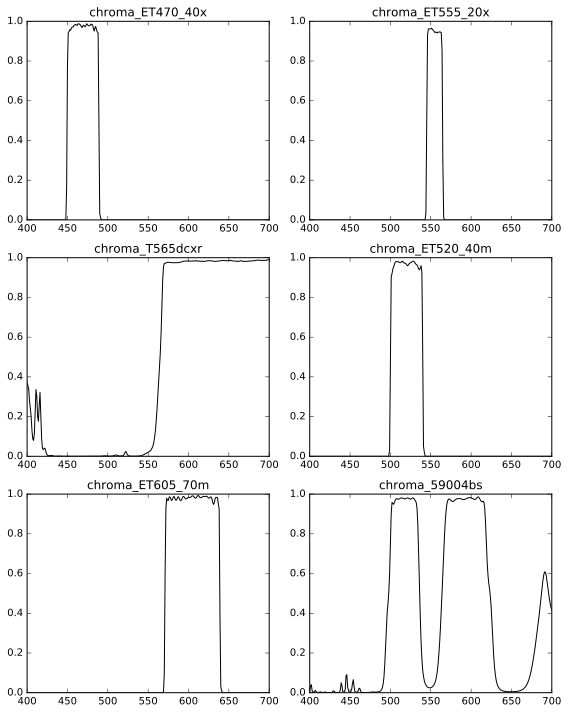

In [25]:
figure(figsize = (8,10))
subplot(3,2,1)
spectrum = spectra_dict['chroma_ET470_40x']
plot(spectrum[:,0],spectrum[:,1],color = 'k')
gca().set_title('chroma_ET470_40x')

subplot(3,2,2,sharex = gca())
spectrum = spectra_dict['chroma_ET555_20x']
plot(spectrum[:,0],spectrum[:,1],color = 'k')
gca().set_title('chroma_ET555_20x')

subplot(3,2,3,sharex = gca())
spectrum = spectra_dict['chroma_T565lpxr']
plot(spectrum[:,0],spectrum[:,1],color = 'k')
gca().set_title('chroma_T565dcxr')

subplot(3,2,4,sharex = gca())
spectrum = spectra_dict['chroma_ET520_40m']
plot(spectrum[:,0],spectrum[:,1],color = 'k')
gca().set_title('chroma_ET520_40m')

subplot(3,2,5,sharex = gca())
spectrum = spectra_dict['chroma_ET605_70m']
plot(spectrum[:,0],spectrum[:,1],color = 'k')
gca().set_title('chroma_ET605_70m')

subplot(3,2,6,sharex = gca())
spectrum = spectra_dict['chroma_59004bs']
plot(spectrum[:,0],spectrum[:,1],color = 'k')
gca().set_title('chroma_59004bs')

gca().set_xbound(400,700)
tight_layout()
savefig('spectra.svg')

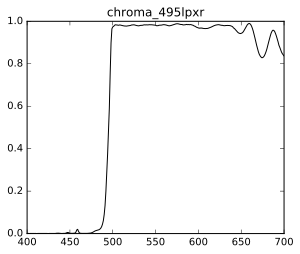

In [29]:
figure(figsize = (8,10))
subplot(3,2,1)
spectrum = spectra_dict['chroma_T495lpxr']
plot(spectrum[:,0],spectrum[:,1],color = 'k')
gca().set_title('chroma_495lpxr')

gca().set_xbound(400,700)
tight_layout()
savefig('spectra2.svg')

In [130]:
import hs_genotypes as hs
reload(hs)

<module 'hs_genotypes' from 'hs_genotypes.py'>

### 1/31/2016
*heat shock plan*

##### Strains for spatial heat shock expression experiments

Simplest approach - flipout a stop from ubi-p63 driven Stinger. These lines were developed as part of g-Trace system. Evans et al. Nature Methods 6, 603 - 605 (2009) 

* 32249 P{Ubi-p63E(FRT.STOP)Stinger}5F1, w*
* 32250 w*; P{Ubi-p63E(FRT.STOP)Stinger}9F6
* 32251 w*; P{Ubi-p63E(FRT.STOP)Stinger}15F2

Ubiquitous expression of FRT flanked GAL80 on Chromosome 2 and 3, heat shock should permit expression in clones by removing GAL80 expression

* 38880 w[*]; P{w[+mC]=alphaTub84B(FRT.GAL80)}2/CyO; TM2/TM6B, Tb[1]
* 38881 w[*]; Bl[1]/CyO; P{w[+mC]=alphaTub84B(FRT.GAL80)}3

** I'm not sure if these are flipout or just flip GAL80

Ubiquitous expression of FRT stop GAL80, heat shock should suppress expression by removing FRT stop from clones

* 38878 w[*]; P{w[+mC]=tubP(FRT.stop)GAL80}2; MKRS/TM6B, Tb[1]
* 39213 w[*]; wg[Sp-1]/CyO; P{w[+mC]=tubP(FRT.stop)GAL80}3

** I believe these flies are tubP>stop>GAL80

Test heat shock concept by HS removal of FRT.stop from UAS-GFP

* 55810 w[1118]; P{y[+t7.7] w[+mC]=10XUAS(FRT.stop)GFP.Myr}su(Hw)attP5
* 55811 w[1118]; P{y[+t7.7] w[+mC]=10XUAS(FRT.stop)GFP.Myr}su(Hw)attP1
* 30125 y[1] w[1118]; P{w[+mC]=UAS(FRT.stop)mCD8-GFP.H}11/CyO;+
* 30032 y[1] w[1118]; Pin[1]/CyO; P{w[+mC]=UAS(FRT.stop)mCD8-GFP.H}14, P{w[+mC]=UAS(FRT.stop)mCD8-GFP.H}21B / TM6B Tb

Heat shock flippase aspartic acid at residue 5, fly codon optimized chromosome I and II.

* 55818 w[1118] P{y[+t7.7] w[+mC]=hs-FLPD5.fco}attP3
* 56749 w[1118]; P{y[+t7.7] w[+mC]=hs-FLPD5.fco}attP40

Expresses Gal4 ubiquitiously - for testing.

* 5138 y[1] w[*]; P{w[+mC]=tubP-GAL4}LL7/TM3, Sb[1] Ser[1]
* 42738 y[1] w[*]; P{w[+mW.hs]=shi-GAL4.S}2/CyO

Ubiquitous expression of GAL4 under the control of the Act5C promoter following removal of a y[+] cassette by FLP recombinase.

* 3953 w[1118]; P{w[+mC]=AyGAL4}25/CyO

##### Objective 0: Identify constructs for protocol development
Before testing heat gradients I want to identify lines that provide a convenient mechansism for monitoring heat-shock induction. It will also be usefull to determine the how developmental timing interacts with flippase induction.
* Is it better to flip-out gal80, stop-gal4 or stop-gal80?
* Is there a protocol that we can use to induce flippase expression post-mitotically? 
* What is the nessesary HS duration and temperature?
* Are the pulse parameters different for developmental pulses - can we HS a single embrio?
* What are the effects of these protocols on flight behavior?
* if we try to pulse during development when is the approprate time to maintain lateralization of clones? 

____
This is probably the simplest way to start -- fip out a stop from ubiquitin driven Stinger. Nice because it only invovles a single cross.

from Evans et al. Nature Methods 6, 603 - 605 (2009) 

In [131]:
hs.strains['objective 0: HS flipout of stop Stinger']

w[1118],P{Ubi-p63E(FRT.STOP)Stinger}9F6,+
w[*],P{y[+t7.7] w[+mC]=hs-FLPD5.fco}attP40,+


____
This would test out an approach where we flip out a stop 5' of an effector. For instance UAS>stop>GFP in flies with Gal4 expression driven ubiquitously using tubP. We don't have a UAS>stop>CsChrimson but my guess is that it won't be long before someone makes it.

In [128]:
hs.strains['objective 0: HS flipout of UAS >stop> GFP']

w[1118],P{y[+t7.7] w[+mC]=hs-FLPD5.fco}attP40,"P{w[+mC]=UAS(FRT.stop)mCD8-GFP.H}14, P{w[+mC]=UAS(FRT.stop)mCD8-GFP.H}21B"
w[*],+,P{w[+mC]=tubP-GAL4}LL7


___
Another approach is to flip out a stop from tubP>stop>Gal80, here HS would suppress expression. The question is can non-HS flies even survive with GFP expressed in every cell? Maybe it would be better to try this approach in a line with a more restricted GAL-4 driver than tubP?

In [129]:
hs.strains['objective 0: HS flipout of tubP >stop> Gal80']

w[1118],P{y[+t7.7] w[+mC]=hs-FLPD5.fco}attP40,P{10XUAS-IVS-Syn21-GFP-p10}attP2
w[*],P{w[+mC]=tubP(FRT.stop)GAL80},P{w[+mC]=tubP-GAL4}LL7


___
Converse of the approach above - now HS induces expresion.

In [107]:
hs.strains['objective 0: HS flipout of alphaTub Gal80']

w[1118],P{y[+t7.7] w[+mC]=hs-FLPD5.fco}attP40,P{w[+mC]=alphaTub84B(FRT.GAL80)}
w[*],P{w[+mC]=tubP-GAL4}LL7,P{10XUAS-IVS-Syn21-GFP-p10}attP2


### 6/6/2016
*new ubuntu setup*

```
sudo apt-get --assume-yes install python-numpy python-scipy python-matplotlib ipython ipython-notebook python-pandas python-sympy python-nose
sudo apt-get --assume-yes update
sudo apt-get --assume-yes upgrade
sudo apt-get --assume-yes install python-pip
pip install --upgrade pip
pip install jupyter
echo PATH="\$HOME/.local/bin:\$PATH" >> ~/.bashrc
wget http://downloads.imagej.net/fiji/latest/fiji-linux64.zip
unzip fiji-linux64.zip
sudo mv Fiji.app/ /opt/
echo alias Fiji='/opt/Fiji.app/ImageJ-linux64' >> ~/.profile
sudo pip install h5py
sudo apt-get --assume-yes install python-qt4 python-opengl python-qt4-gl
sudo apt-get --assume-yes install git
mkdir ~/src.git
cd ~/src.git
git clone https://github.com/pyqtgraph/pyqtgraph.git
git clone https://github.com/FlyRanch/figurefirst.git
sudo sh -c 'echo "deb http://packages.ros.org/ros/ubuntu $(lsb_release -sc) main" > /etc/apt/sources.list.d/ros-latest.list'
sudo apt-key adv --keyserver hkp://ha.pool.sks-keyservers.net:80 --recv-key 0xB01FA116
sudo apt-get update
sudo apt-get --assume-yes install ros-kinetic-desktop-full
echo export PYTHONPATH=\$HOME/src.git/figurefirst/:\$PYTHONPATH >> ~/.bashrc
echo export PYTHONPATH=\$HOME/src.git/pyqtgraph/:\$PYTHONPATH >> ~/.bashrc
source ~/.bashrc
sudo pip install tifffile
sudo apt-get --assume-yes install python-skimage
echo export PYTHONPATH=\$HOME/src.git/planotaxis/:\$PYTHONPATH >> ~/.bashrc
sudo pip install jupyter_nbextensions_configurator
jupyter nbextensions_configurator enable --user
cd ~/src.git
git clone https://github.com/ipython-contrib/IPython-notebook-extensions.git
cd IPython-notebook-extensions/
sudo ./setup.py install
cd ~
sudo apt-get --assume-yes install qt4-designer
cp ~/src.git/figurefirst/inkscape_extensions/*.inx  ~/.config/inkscape/extensions/
cp ~/src.git/figurefirst/inkscape_extensions/*.py  ~/.config/inkscape/extensions/
```

### 7/18/2016
*Fun Facts about cortex*

Per mm^3 cortex:
    * 1000000 Neurons
    * 0.4km dendrites
    * ~4km Axons
    
10 - 30 fold drop in $V{in}$ going from soma back into dendrites


### 7/19/2016
*Juan marco hippocampus*

Karl Lashley

- memory is sparsely distributed
- Mass action theory
- Equapotential theory

Brenda Milner:

- patient HM

Tim Bliss and Terje Lomo:

- discovery of LTP

Mark Bear:

- Mark Bear - showed ltp in response to fear conditioning in vivo

Mark Mayford:

- Showed induction of gene expression during fear conditioning. GluR1 targeted to mushroom synapses.

Alice Pavlowskiy Emma Wallace:
- Working with Andre and Hans.
- APA Memory Training (rotating shock plate) Needs to avoid place.
- Sa correlations between behavior/synaptic plasticity/gene expression


### 7/19/2016
*Reiser*

JJ Gibsion (1940) Optic flow - The ecological approach to visual perception (1979).
David Lee Visual proprioceptive control of standing in human infants (1974).
Mercator projection. - If vision was perfect.

- Buchner and Buchner 1982. Identified Lobular plate as motion center.
- Klaus Hausen 1976-84 Charactarized H1 and V1 Large giant cells
- Ruteger Weiner Matched Filter. 

Davi Bock - serial EM

Buchner: Elementary Movement Detectors in an insect visual system
- Showed that inputs from neighboring neurons were the important ones for computation

Broke down motion detection:
-started by asking : 
    - can you detect a bar using a single photoreceptor?
    - anamation of sweeping a bar across a photo receptor.
    - Then added another neuron and made the point that you need a spatial separation, a separation in time and a non-linearity. (1956) (coincidence)
    - Barlow-Levick (1965) (veto)
    

### 7/19/2016
*Ephys tether*

Glue head and adjust body:

    * Push fly around with minuten. 
    * bend head forward. 
    * Glue.
    * Clip forelegs
    * Glue proboscus
    * Let them drink glue!
    * Remove muscle in head. (can't see it)
    * pull off sheath (pick at it with forcepts)

### 7/20/2016
*Todd Sacktor*

-storosporin (blocks 80% of protien kinases)
-cleave PKC to allow PKM to continue to phosphorolate  

### 7/21/2016
*Michael Brech*

Somatosensory leasions lead to body 'concept' deficits

- Strong locking to wisking in somatosensory cortext when another rat shows up
- SSMctx response is strongest when noses are aligned
- sexualy dimorphic 'gain' is dependent on estrus cycle

### 7/22/2016
*Michael Reiser*

Synapses onto T4 neurons: Tm3,Mi4,Mi9
Mi1 Tm3 - excitatory 
Mi4 Mi9 - inhibitory

### 7/22/2016
*Mark Harnett*

Top down - Motor arbor (distal tuft)
Bottom up - sensory near soma

- Top down alone (epsp), Bottom up alone (spike), top down + Bottom up (Plateau potential). (calcium spike).
- In vivo during active wisking large spikes
- Calcium spikes don't seem to backprop when evoked in slice
    - active mechanism? Cable theory predicts the opposite result
    - K channels enhance backprop.
    - AcH leads to calcium transients as a result of electrical stimulation
    - Muscarine evokes very large calcium transients
    - Seems also to be important in vivo (atropene)
    

### 7/23/2016
*Dickinson*

nicholas minorscky

"compute with chemistry" Simon Lauhlin

### 7/26/2016
*Chris Moore*

- Correlation doesn't matter. Poulet and Petersen (2008,2016) Cohen and Maunsen 
- Ables M In sparse cortex correlations are required to drive downstream targets.
- Basic model - Most cells are inactive, some cells are activated, but a few cells are activated and tuned to hit vs miss trials. Basicly selective gain is applied to a small subset of correlated cells.
- Increased activity would normally induce correlations, but can de-correlated by fast inhibition. It is possible to selectively increase correlations by seletive inhibition to create imbalance in the inhibition.
- 'Coordinated Aristocracy'

### 7/27/2016
*Gilles Laurent*

Leonard Eichberd

David Marr - levels of understanding.
Turtles - 3 layer cortex

    Turtle cortex (LC [D,DM] MC)
    Medial cortex thought to be equivelent to hipocampus in mammals.
    Visual cortex is turtles do not show retinoopy
    No orientation selectivity
    Cant record from cortex in awake turtles (two floppy)
    REM cycles have only previously been shown in birds and mammals (homiotherms) (polyphyletic) or not...
    Identified Delta and beta waves in sleeping lizards
    Metric is Delta/beta - value cycles periodically during the night. 
    Very regular periods (80s) apears to be temperature dependent. 
    Looks like they see sharp waves (200-400) with ripples riding on top.
    (ripples) Okeef 1976, Buzaki 1996,Bargin 1999,Siapas 2016,Wilson McNaughton 1994,Brenda Milner
    Anticorrelation between slow wave and Rapid Eye Movements.
    Sharp wave in DVR's and slow wave activity in cortex.
    DVR and cortex are not independent. (dip in cortex - followed by sharp waves and then cortex picks up)
    same as timing between  Siapas and wilson CA1 and piraform?
    

In [4]:
import numpy as np

from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook

N = 1000
x = np.linspace(0, 10, N)
y = np.linspace(0, 10, N)
xx, yy = np.meshgrid(x, y)
d = np.sin(xx)*np.cos(yy)

p = figure(x_range=(0, 10), y_range=(0, 10))

# must give a vector of image data for image parameter
p.image(image=[d], x=0, y=0, dw=10, dh=10, palette="Spectral11")

#output_file("image.html", title="image.py example")
output_notebook()

Loading BokehJS ...